# Dataframes

## Tenis de Mesa

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [28]:
tenis = pd.read_csv('../Raw_Datasets/Trabajado/pingpong.csv', sep=';')
tenis

,# Distrito,Junta de Distrito,Tipo,Instalación deportiva,Dirección,Tenis de mesa
0,1,Centro,IDB,Parque Atenas,"Pº Virgen del Puerto, 3B c/v Pº de Plasencia",1
1,1,Centro,IDB,Parque la Cornisa,C/ Rosario (detrás de San Francisco El Grande),1
2,1,Centro,IDB,Plaza Arturo Barea,Plaza Arturo Barea,1
3,2,Arganzuela,IDB,Juan de Mariana,"C/ Juan de Mariana, 8C (PO)",2
4,3,Retiro,IDB,Cerro Negro,"C/ Cerro Negro, 5",1
...,...,...,...,...,...,...
71,19,Vicálvaro,IDB,Cordel de Pavones,"C/ Cordel de Pavones, 9",3
72,19,Vicálvaro,IDB,Parque de la Vicalvarada,"C/ Vereda del Pinar, 1",1
73,20,San Blas - Canillejas,CDM,San Blas,"C/ Arcos del Jalón, 59",3
74,20,San Blas - Canillejas,IDB,Electra,"C/ Cronos, 65",1


In [29]:
tenis = tenis.drop(columns='Tipo')

In [32]:
import geocoder

def geocode_address(address):
    location = geocoder.osm(address)
    if location.ok:
        return location.lat, location.lng
    else:
        return None, None

tenis['Latitud'], tenis['Longitud'] = zip(*tenis['Dirección'].apply(geocode_address))

In [33]:
tenis

,# Distrito,Junta de Distrito,Instalación deportiva,Dirección,Tenis de mesa,Latitud,Longitud
0,1,Centro,Parque Atenas,"Pº Virgen del Puerto, 3B c/v Pº de Plasencia",1,NaN,NaN
1,1,Centro,Parque la Cornisa,C/ Rosario (detrás de San Francisco El Grande),1,NaN,NaN
2,1,Centro,Plaza Arturo Barea,Plaza Arturo Barea,1,40.408352,-3.703593
3,2,Arganzuela,Juan de Mariana,"C/ Juan de Mariana, 8C (PO)",2,NaN,NaN
4,3,Retiro,Cerro Negro,"C/ Cerro Negro, 5",1,10.091385,-85.561019
...,...,...,...,...,...,...,...
71,19,Vicálvaro,Cordel de Pavones,"C/ Cordel de Pavones, 9",3,40.401115,-3.619120
72,19,Vicálvaro,Parque de la Vicalvarada,"C/ Vereda del Pinar, 1",1,NaN,NaN
73,20,San Blas - Canillejas,San Blas,"C/ Arcos del Jalón, 59",3,37.620924,-0.989776
74,20,San Blas - Canillejas,Electra,"C/ Cronos, 65",1,38.366803,-0.442317


## Sendas

In [16]:
import geopandas as gpd

In [35]:
sendas = gpd.read_file('../Raw_Datasets/Trabajado/spacmsendasnaturaleza.json')

In [36]:
sendas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            224 non-null    object  
 1   CDID          224 non-null    int64   
 2   CD_SENDA      95 non-null     object  
 3   DS_NOMBRE     224 non-null    object  
 4   CD_CATEGORIA  224 non-null    object  
 5   DS_CATEGORIA  224 non-null    object  
 6   DS_INICIO     224 non-null    object  
 7   DS_FINAL      221 non-null    object  
 8   DS_LONGITUD   224 non-null    object  
 9   CD_SUBCAT     68 non-null     object  
 10  DS_SUBCAT     68 non-null     object  
 11  DS_ENP        122 non-null    object  
 12  COLOR_FILL    224 non-null    object  
 13  COLOR_STROKE  224 non-null    object  
 14  geometry      224 non-null    geometry
dtypes: geometry(1), int64(1), object(13)
memory usage: 26.4+ KB


In [37]:
sendas = sendas.drop(columns=['COLOR_FILL', 'COLOR_STROKE', 'CD_SUBCAT', 'DS_SUBCAT', 'CD_SENDA', 'id'])

In [38]:
sendas

,CDID,DS_NOMBRE,CD_CATEGORIA,DS_CATEGORIA,DS_INICIO,DS_FINAL,DS_LONGITUD,DS_ENP,geometry
0,131,Paseos por el Valle de El Paular. Camino de Ra...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,Parque Nacional de la Sierra de Guadarrama,"LINESTRING (426199.309 4528647.264, 426203.466..."
1,132,Paseos por el Valle de El Paular: Camino a la ...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,Parque Nacional de la Sierra de Guadarrama,"LINESTRING (425284.437 4526628.865, 425313.908..."
2,140,Senda Soto Bayona: Tramo adaptado,ENP,Rutas por la Red de Espacios Naturales Protegidos,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,Parque Regional del Sureste,"LINESTRING (451150.280 4443398.392, 451146.138..."
3,141,Un paseo por El Campillo: el Agua,ENP,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,Parque Regional del Sureste,"LINESTRING (456487.575 4463670.374, 456475.007..."
4,142,Un paseo por El Campillo: el Agua. Tramo de se...,ENP,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,Parque Regional del Sureste,"LINESTRING (456687.875 4463375.235, 456705.337..."
...,...,...,...,...,...,...,...,...,...
219,216,Senda de Molino a Molino,VER,Sendas Verdes de Madrid,"La Hiruela, saliendo del pueblo por la izquier...","La Hiruela, saliendo del pueblo por la izquier...",4,NaN,"LINESTRING (461647.994 4547253.457, 461671.157..."
220,217,Senda por las eras y la pila de riego,VER,Sendas Verdes de Madrid,"La Hiruela, c/ Pilón","La Hiruela, c/ Pilón",3,NaN,"LINESTRING (461646.847 4547255.456, 461657.912..."
221,218,Senda de los Robles Centenarios,VER,Sendas Verdes de Madrid,"Puebla de la Sierra, c/ de la Fuente de Abajo","Puebla de la Sierra, c/ de la Fuente de Abajo",3,NaN,"MULTILINESTRING ((462663.574 4541139.099, 4626..."
222,219,Senda Rodeando la Dehesa Boyal Lomo Peral,VER,Sendas Verdes de Madrid,Depósito de agua de Prádena del Rincón,Depósito de agua de Prádena del Rincón,5,NaN,"LINESTRING (454540.099 4543738.587, 454535.257..."


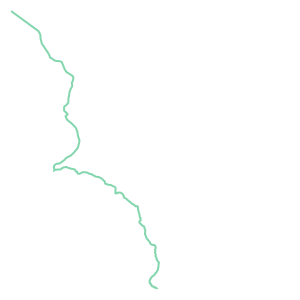

In [39]:
sendas['geometry'][1]

In [40]:
sendas['geometry']

0      LINESTRING (426199.309 4528647.264, 426203.466...
1      LINESTRING (425284.437 4526628.865, 425313.908...
2      LINESTRING (451150.280 4443398.392, 451146.138...
3      LINESTRING (456487.575 4463670.374, 456475.007...
4      LINESTRING (456687.875 4463375.235, 456705.337...
                             ...                        
219    LINESTRING (461647.994 4547253.457, 461671.157...
220    LINESTRING (461646.847 4547255.456, 461657.912...
221    MULTILINESTRING ((462663.574 4541139.099, 4626...
222    LINESTRING (454540.099 4543738.587, 454535.257...
223    LINESTRING (393549.921 4494661.829, 393547.818...
Name: geometry, Length: 224, dtype: geometry

In [41]:
import utm

def utm_to_latlon(coords_list):
    return [utm.to_latlon(easting, northing, 30, "T") for easting, northing in coords_list]

def convert_to_latlon(geometry):
    if geometry.type == "LineString":
        return utm_to_latlon(geometry.coords)
    elif geometry.type == "MultiLineString":
        result = []
        for line_string in geometry.geoms:
            result.extend(utm_to_latlon(line_string.coords))
        return result
    else:
        raise ValueError(f"Tipo de geometría no soportada: {geometry.type}")

sendas["lat_lon_list"] = sendas["geometry"].apply(convert_to_latlon)

C:\Users\ciruz\AppData\Local\Temp\ipykernel_18704\2676304331.py:7: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "LineString":


C:\Users\ciruz\AppData\Local\Temp\ipykernel_18704\2676304331.py:9: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == "MultiLineString":


In [42]:
sendas['lat_lon_list'][0]

[(40.905598698613964, -3.8762650172744095),
 (40.905684658127626, -3.876216794548245),
 (40.90607483403453, -3.8750352854270984),
 (40.90634667981597, -3.8744829540559764),
 (40.90655202289854, -3.874143555734919),
 (40.90673157710159, -3.873996249777089),
 (40.906918512648886, -3.873945256080874),
 (40.90706449331332, -3.873947176823138),
 (40.90756257586244, -3.87392610607897),
 (40.90772732579657, -3.8738874347628323),
 (40.90793128808846, -3.8735523277812103),
 (40.90804717552781, -3.8732438157960547),
 (40.90812948905294, -3.8730845335899238),
 (40.90813913595174, -3.8728815338461096),
 (40.90811105013767, -3.872629566267713),
 (40.90805445287098, -3.8722817295992957),
 (40.9080005697375, -3.871795592849578),
 (40.90801037855406, -3.871443863720431),
 (40.908087101214946, -3.871180993883108),
 (40.908326649352674, -3.8706068243615994),
 (40.9085017985342, -3.8699676624091213),
 (40.90861093587457, -3.86947730509904),
 (40.90864511811299, -3.868708000114443),
 (40.90867540184789, -

In [43]:
def convert_tuples_to_lists(tup_list):
    return [list(tup) for tup in tup_list]

# Aplicar la función a la columna 'lat_lon_list' usando apply y lambda
sendas['lat_lon_list'] = sendas['lat_lon_list'].apply(lambda x: convert_tuples_to_lists(x))
sendas['lat_lon_list'][0]

[[40.905598698613964, -3.8762650172744095],
 [40.905684658127626, -3.876216794548245],
 [40.90607483403453, -3.8750352854270984],
 [40.90634667981597, -3.8744829540559764],
 [40.90655202289854, -3.874143555734919],
 [40.90673157710159, -3.873996249777089],
 [40.906918512648886, -3.873945256080874],
 [40.90706449331332, -3.873947176823138],
 [40.90756257586244, -3.87392610607897],
 [40.90772732579657, -3.8738874347628323],
 [40.90793128808846, -3.8735523277812103],
 [40.90804717552781, -3.8732438157960547],
 [40.90812948905294, -3.8730845335899238],
 [40.90813913595174, -3.8728815338461096],
 [40.90811105013767, -3.872629566267713],
 [40.90805445287098, -3.8722817295992957],
 [40.9080005697375, -3.871795592849578],
 [40.90801037855406, -3.871443863720431],
 [40.908087101214946, -3.871180993883108],
 [40.908326649352674, -3.8706068243615994],
 [40.9085017985342, -3.8699676624091213],
 [40.90861093587457, -3.86947730509904],
 [40.90864511811299, -3.868708000114443],
 [40.90867540184789, -

In [55]:
sendas['lat_lon_list'][4]

[[40.3197791134375, -3.5097920954715267],
 [40.31959886372623, -3.509585203722439],
 [40.31941853135838, -3.5093969974954966],
 [40.31926280238282, -3.509034583820895],
 [40.319182442370355, -3.5087802764228426],
 [40.31916997449793, -3.5087398526862392],
 [40.31895092544456, -3.508140291378639],
 [40.318678241731675, -3.507540332319038],
 [40.31834612711535, -3.506630701070146],
 [40.31820192639688, -3.5060830956025306],
 [40.31816090034609, -3.5056530413206954],
 [40.318157462276446, -3.504802862129184],
 [40.318177458257054, -3.504317208876117],
 [40.31822648287206, -3.503733676366773],
 [40.31844378372635, -3.5030976734502084],
 [40.31853412421597, -3.502878797630843],
 [40.318653351925846, -3.5025947385508407],
 [40.318765286084904, -3.5023433229277354],
 [40.31890220721543, -3.5021014340238334],
 [40.31902102773555, -3.5019107936846288],
 [40.3191040327897, -3.501733901274384],
 [40.31917647327357, -3.501519560301283],
 [40.319209765717346, -3.501262888101616],
 [40.3192214228878

In [57]:
sendas.drop(columns='geometry', inplace=True)

In [58]:
sendas

,CDID,DS_NOMBRE,CD_CATEGORIA,DS_CATEGORIA,DS_INICIO,DS_FINAL,DS_LONGITUD,DS_ENP,lat_lon_list
0,131,Paseos por el Valle de El Paular. Camino de Ra...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,Parque Nacional de la Sierra de Guadarrama,"[[40.905598698613964, -3.8762650172744095], [4..."
1,132,Paseos por el Valle de El Paular: Camino a la ...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,Parque Nacional de la Sierra de Guadarrama,"[[40.887335296390866, -3.8868835643175763], [4..."
2,140,Senda Soto Bayona: Tramo adaptado,ENP,Rutas por la Red de Espacios Naturales Protegidos,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,Parque Regional del Sureste,"[[40.13950232543426, -3.5734478536309267], [40..."
3,141,Un paseo por El Campillo: el Agua,ENP,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,Parque Regional del Sureste,"[[40.32242758620203, -3.5121696695195457], [40..."
4,142,Un paseo por El Campillo: el Agua. Tramo de se...,ENP,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,Parque Regional del Sureste,"[[40.3197791134375, -3.5097920954715267], [40...."
...,...,...,...,...,...,...,...,...,...
219,216,Senda de Molino a Molino,VER,Sendas Verdes de Madrid,"La Hiruela, saliendo del pueblo por la izquier...","La Hiruela, saliendo del pueblo por la izquier...",4,NaN,"[[41.07563265812039, -3.4565419120469554], [41..."
220,217,Senda por las eras y la pila de riego,VER,Sendas Verdes de Madrid,"La Hiruela, c/ Pilón","La Hiruela, c/ Pilón",3,NaN,"[[41.07565060528044, -3.4565556900596115], [41..."
221,218,Senda de los Robles Centenarios,VER,Sendas Verdes de Madrid,"Puebla de la Sierra, c/ de la Fuente de Abajo","Puebla de la Sierra, c/ de la Fuente de Abajo",3,NaN,"[[41.02060244504218, -3.4440823482548075], [41..."
222,219,Senda Rodeando la Dehesa Boyal Lomo Peral,VER,Sendas Verdes de Madrid,Depósito de agua de Prádena del Rincón,Depósito de agua de Prádena del Rincón,5,NaN,"[[41.04360532386895, -3.5408914563171012], [41..."


REVISAAAAAAAAAAAAAR

In [44]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        rawdata = file.read()
    result = chardet.detect(rawdata)
    return result['encoding']

file_path = '../Raw_Datasets/Trabajado/centros_servicios_establecimientos_sanitarios.csv'
encoding = detect_encoding(file_path)

print(f"El archivo CSV está codificado en: {encoding}")


El archivo CSV está codificado en: ISO-8859-1


In [45]:
pd.read_csv('../Raw_Datasets/Trabajado/201544-0-centros-salud.csv', sep=';', encoding='ISO-8859-1')

# Este dataset no sirve, solo cuenta con 38 centros sanitarios y varios son demasiado específicos, sin contar que uno es de animales.

,PK,NOMBRE,DESCRIPCION-ENTIDAD,HORARIO,EQUIPAMIENTO,TRANSPORTE,DESCRIPCION,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,...,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD,TELEFONO,FAX,EMAIL,TIPO,Unnamed: 32
0,11899,Centro de Atención integral sociosanitaria noc...,NaN,De lunes a domingo de 21 a 8 horas,Servicio de alimentación básica: Ofrece alime...,Metro: Alonso Martínez Bus: 21,Información Complementaria: Drogodependie...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,HERMANOS ALVAREZ QUINTERO,...,CENTRO,440835,4475437,40.427474,-3.697485,916 035 651,NaN,NaN,/contenido/entidadesYorganismos/CentrosAtencio...,
1,5855213,Centro de Atención integral sociosanitario diu...,El Centro de atención integral sociosanitario ...,De lunes a viernes de 9 a 17 horas,Valoración interdisciplinar del/de la paciente...,"Metro: Alonso Martínez, L4, L5, L10",Forma de acceso: directo,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,HERMANOS ALVAREZ QUINTERO,...,CENTRO,440835,4475437,40.427474,-3.697485,914 291 960,NaN,ctdcentro@cruzroja.es,/contenido/entidadesYorganismos/CentrosAtencio...,
2,4535271,Organismo Autónomo Madrid Salud,Gestión de las políticas municipales en las ma...,De lunes a viernes de 8:30 a 14 horas Cerrado:...,NaN,Metro: Conde Casal Bicicletas: Servicio B...,NaN,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MEDITERRANEO,...,RETIRO,443447,4473015,40.405829,-3.666486,914 804 272 \r\n914 8...,NaN,msgerencia@madrid.es,/contenido/entidadesYorganismos/AyuntamientoMa...,
3,134929,Centro Concertado de Atención a las Adicciones...,El CCAD Cáritas que forma parte de la red de...,"De lunes a viernes mañanas de 9 a 14 horas, ta...",Valoración interdisciplinar del/de la paciente...,"Bus: 9, 73, N2 Metro: Alfonso XIII (L4), Prosp...",NaN,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,SANTA HORTENSIA,...,CHAMARTIN,443159,4477482,40.446053,-3.670277,917 440 599,NaN,tto.adicciones@caritasmadrid.org,/contenido/entidadesYorganismos/CentrosAtencio...,
4,11867,Centro de Atención a las Adicciones (CAD) de A...,NaN,Horario ordinario: De septiembre a junio: ...,Valoración por equipo interdisciplinar Trata...,"Bus: 6 , 8 , 18 , 19 , 22 , 45 , 47 , 76 , 78 ...","Forma de acceso : directo, a través de los ser...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CHOPERA,...,ARGANZUELA,440757,4471619,40.393057,-3.698067,915 886 186,NaN,cadarganzuela@madrid.es,/contenido/entidadesYorganismos/CentrosAtencio...,
5,11887,Centro de Atención a las Adicciones (CAD) de H...,NaN,Horario ordinario: De septiembre a junio: ...,Valoración por equipo interdisciplinar Trata...,"Bus: 73, 87, 104, 112, 120, 125, 153, 172 Metr...","Acceso: directo, a través de los servicios mu...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MINAYA,...,HORTALEZA,446072,4479929,40.468289,-3.636150,913 822 530,NaN,cadhortaleza@madrid. es,/contenido/entidadesYorganismos/CentrosAtencio...,
6,11862,Centro de Atención a las Adicciones (CAD) de L...,NaN,Horario ordinario: De septiembre a junio: ...,Valoración por equipo interdisciplinar Trata...,"Bus: 25 , 31, 138 Metro: Laguna ( L 6 ), Casa ...","Acceso : directo, a traves de los servicios mu...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CAMARENA,...,LATINA,435820,4471982,40.395971,-3.756272,917 198 989,NaN,cadlatina@madrid.es,/contenido/entidadesYorganismos/CentrosAtencio...,
7,11865,Centro de Atención a las Adicciones (CAD) de S...,NaN,Horario ordinario: De septiembre a junio: ...,Valoración por equipo interdisciplinar Trata...,"Bus: 77, 104, 105, 775 Metro: Suances ( L 5 )","Acceso: directo, a traves de los servicios mu...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALCALA,...,NaN,446815,4476892,40.440978,-3.627132,917 434 771,NaN,cadsanblas@madrid.es,/contenido/entidadesYorganismos/CentrosAtencio...,
8,11866,Centro de Atención a las Adicciones (CAD) de T...,NaN,Horario ordinario: De septiembre a junio: ...,Valoración por equipo interdisciplinar Trata...,"Bus: 42 Metro: Ventilla ( L-9 ), Valdeaceder

In [46]:
censalud = pd.read_csv('../Raw_Datasets/Trabajado/centros_servicios_establecimientos_sanitarios.csv',
                       sep=';',
                       encoding = 'ISO-8859-1')
censalud

,centro_nro_registro,centro_tipo,dependecia_funcional,dependecia_patrimonial,oferta_asistecial,municipio_nombre,direccion_vial_tipo,direccion_vial_nombre,direccion_vial_nro,direccion_informacon_adicional,direccion_codigo_postal,localizacion_coordenada_x,localizacion_coordenada_y
0,CH0001,Hospital especializado,Mutua de Accidentes de Trabajo,Mútua Patronal,Medicina general/de familia,Majadahonda,CTRA,M-515 (POZUELO),61,EDIFICIO A-C-D,28220.0,427057.0,4478720.0
1,CH0001,Hospital especializado,Mutua de Accidentes de Trabajo,Mútua Patronal,Cardiología,Majadahonda,CTRA,M-515 (POZUELO),61,EDIFICIO A-C-D,28220.0,427057.0,4478720.0
2,CH0001,Hospital especializado,Mutua de Accidentes de Trabajo,Mútua Patronal,Fisioterapia,Majadahonda,CTRA,M-515 (POZUELO),61,EDIFICIO A-C-D,28220.0,427057.0,4478720.0
3,CH0001,Hospital especializado,Mutua de Accidentes de Trabajo,Mútua Patronal,Cirugía general y digestivo,Majadahonda,CTRA,M-515 (POZUELO),61,EDIFICIO A-C-D,28220.0,427057.0,4478720.0
4,CH0001,Hospital especializado,Mutua de Accidentes de Trabajo,Mútua Patronal,Farmacia,Majadahonda,CTRA,M-515 (POZUELO),61,EDIFICIO A-C-D,28220.0,427057.0,4478720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41932,SS0283,Servicio sanitario integrado en una organizaci...,Privado No Benéfico,Privados,Otras unidades asistenciales,"Molinos, Los",CALLE,San Nicolás,5,NaN,28460.0,409407.0,4506779.0
41933,SS0283,Servicio sanitario integrado en una organizaci...,Privado No Benéfico,Privados,Medicina general/de familia,"Molinos, Los",CALLE,San Nicolás,5,NaN,28460.0,409407.0,4506779.0
41934,SS0285,Servicio sanitario integrado en una organizaci...,Privado No Benéfico,Privados,Fisioterapia,Majadahonda,CALLE,Azafrán,4,NaN,28222.0,426359.0,4478639.0
41935,SS0286,Servicio sanitario integrado en una organizaci...,Privado No Benéfico,Privados,Medicina estética,Madrid,CALLE,de Margarita de Parma,1,NaN,28050.0,443994.0,4483253.0


In [47]:
censalud.dependecia_funcional.unique()

array(['Mutua de Accidentes de Trabajo', 'Privado Benéfico (Iglesia)',
       'Privado No Benéfico',
       'Servicios o Institutos de Salud de las CC.AA',
       'Otros CESS Públicos de dependencia Autonómica',
       'Administración Penitenciaria',
       'Otros CESS Públicos de dependencia estatal', 'Municipio',
       'Otro Privado Benéfico', 'Otros CESS Públicos',
       'Otra dependencia funcional', 'Privado Benéfico (Cruz Roja)', nan,
       'Instituto de Salud Carlos III', 'Ministerio de Defensa'],
      dtype=object)

In [48]:
publicos = ['Servicios o Instituso de Salud de las CC.AA',
            'Otros CESS Públicos de dependencia Autonómica',
            'Otros CESS Públicos de dependencia estatal',
            'Municipio',
            'Otros CESS Públicos']

censalud_publicos = censalud[censalud['dependecia_funcional'].isin(publicos)]
censalud_publicos

,centro_nro_registro,centro_tipo,dependecia_funcional,dependecia_patrimonial,oferta_asistecial,municipio_nombre,direccion_vial_tipo,direccion_vial_nombre,direccion_vial_nro,direccion_informacon_adicional,direccion_codigo_postal,localizacion_coordenada_x,localizacion_coordenada_y
4871,CS0311,Otros centros especializados,Otros CESS Públicos de dependencia Autonómica,Comunidad Autónoma,Obtención de muestras,Madrid,PLAZA,DEL CENTRO CIVICO,S/N,NaN,28037.0,447550.0,4475351.0
4872,CS0311,Otros centros especializados,Otros CESS Públicos de dependencia Autonómica,Comunidad Autónoma,Atención sanitaria a drogodependientes,Madrid,PLAZA,DEL CENTRO CIVICO,S/N,NaN,28037.0,447550.0,4475351.0
4974,CS0386,Otros centros especializados,Otros CESS Públicos de dependencia Autonómica,Comunidad Autónoma,Atención sanitaria a drogodependientes,Madrid,CALLE,del Jaspe,40,NaN,28026.0,439996.0,4470274.0
4975,CS0386,Otros centros especializados,Otros CESS Públicos de dependencia Autonómica,Comunidad Autónoma,Obtención de muestras,Madrid,CALLE,del Jaspe,40,NaN,28026.0,439996.0,4470274.0
5029,CS0439,Otros centros especializados,Otros CESS Públicos de dependencia Autonómica,Comunidad Autónoma,Atención sanitaria a drogodependientes,Madrid,CALLE,de Nuestra Señora del Carmen,46,NaN,28039.0,440299.0,4479198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41744,SS0194,Servicio sanitario integrado en una organizaci...,Otros CESS Públicos de dependencia Autonómica,Comunidad Autónoma,Medicina general/de familia,Madrid,AVDA,del Partenón,5,NaN,28042.0,447738.0,4479471.0
41893,SS0264,Servicio sanitario integrado en una organizaci...,Otros CESS Públicos de dependencia estatal,Otros Administración Central,Medicina del trabajo,Madrid,PASEO,de la Castellana,67,1ª PLANTA,28046.0,441322.0,4477395.0
41894,SS0264,Servicio sanitario integrado en una organizaci...,Otros CESS Públicos de dependencia estatal,Otros Administración Central,Enfermería,Madrid,PASEO,de la Castellana,67,1ª PLANTA,28046.0,441322.0,4477395.0
41895,SS0264,Servicio sanitario integrado en una organizaci...,Otros CESS Públicos de dependencia estatal,Otros Administración Central,Otras unidades asistenciales,Madrid,PASEO,de la Castellana,67,1ª PLANTA,28046.0,441322.0,4477395.0


## Fuentes

In [49]:
fuentes = pd.read_csv('../Raw_Datasets/Trabajado/Inventario Fuentes2023.csv', sep=';')
fuentes

,CODIGO,ZONA VERDE / \r\nVIA PUBLICA,DISTRITO,DIRECCION,COMPLEMENTO_DIRECCION,"COORD, X","COORD, Y",SISTEMA DE COORDENADAS,FECHA DATOS,longitud,latitud
0,FUE_01_0001,ZV,CENTRO,PLAZA COMENDADORAS,PLAZA COMENDADORAS,"439892,4997","4475419,798",ETRS89 / UTM Zona 30N,45013,-3.708600,40.427243
1,FUE_01_0002,ZV,CENTRO,JARDINES CONDE DUQUE,JARDINES CONDE DUQUE,"439766,5391","4475585,204",ETRS89 / UTM Zona 30N,45013,-3.710101,40.428724
2,FUE_01_0003,ZV,CENTRO,PLAZA DE LAS SALESAS,PLAZA DE LAS SALESAS,"441077,2599","4475077,763",ETRS89 / UTM Zona 30N,45013,-3.694603,40.424246
3,FUE_01_0004,ZV,CENTRO,PLAZA VILLA DE PARIS,PLAZA VILLA DE PARIS,"441281,789","4475192,9",ETRS89 / UTM Zona 30N,45013,-3.692202,40.425298
4,FUE_01_0005,ZV,CENTRO,PLAZA VILLA DE PARIS,PLAZA VILLA DE PARIS,"441199,3988","4475222,805",ETRS89 / UTM Zona 30N,45013,-3.693176,40.425562
...,...,...,...,...,...,...,...,...,...,...,...
2144,FUEP_21_0035,ZV,BARAJAS,JUAN CARLOS I,B.11 · PASEO SUR,"448355,41","4478638,03",ETRS89 / UTM Zona 30N,45013,-3.609099,40.456803
2145,FUEP_21_0036,ZV,BARAJAS,JUAN CARLOS I,B.11 · PASEO SUR,"448118,84","4478829,1",ETRS89 / UTM Zona 30N,45013,-3.611905,40.458510
2146,FUEP_21_0037,ZV,BARAJAS,JUAN CARLOS I,A.01 · PLAZA SUR,"448247,84","4478883,13",ETRS89 / UTM Zona 30N,45013,-3.610388,40.459004
2147,FUEP_21_12_0038,ZV,BARAJAS,JUAN CARLOS I,D.09 · TALUD RÍA,"448359,97","4478982,41",ETRS89 / UTM Zona 30N,45013,-3.609074,40.459906


In [50]:
fuentes['ZONA VERDE / \r\nVIA PUBLICA'].unique()

array(['ZV', 'VP'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

fuentes['ZONA VERDE / \r\nVIA PUBLICA'] = lb.fit_transform(fuentes['ZONA VERDE / \r\nVIA PUBLICA'])

# ZV = 1 ; VP = 0

In [52]:
fuentes = fuentes.drop(columns=['CODIGO', 'SISTEMA DE COORDENADAS', 'FECHA DATOS', 'COORD, X', 'COORD, Y'])

In [53]:
fuentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ZONA VERDE / 
VIA PUBLICA  2149 non-null   int32  
 1   DISTRITO                    2149 non-null   object 
 2   DIRECCION                   2149 non-null   object 
 3   COMPLEMENTO_DIRECCION       1771 non-null   object 
 4   longitud                    2149 non-null   float64
 5   latitud                     2149 non-null   float64
dtypes: float64(2), int32(1), object(3)
memory usage: 92.5+ KB


## Gasto Calórico

In [68]:
# Estos valores no son reales, hay que buscar otros datos.


pd.set_option('display.max_rows', None)

cal = pd.read_csv('../Raw_Datasets/Trabajado/exercise_dataset.csv')
cal.head(30)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
5,"Cycling, 14-15.9 mph, vigorous",590,704,817,931,2.059443
6,"Cycling, 16-19 mph, very fast, racing",708,844,981,1117,2.471061
7,Unicycling,295,352,409,465,1.029722
8,"Stationary cycling, very light",177,211,245,279,0.617427
9,"Stationary cycling, light",325,387,449,512,1.132626


In [65]:
cal = cal.drop(columns=['130 lb',	'155 lb', '180 lb', '205 lb'])

In [66]:
cal.head(50)

,"Activity, Exercise or Sport (1 hour)",Calories per kg
0,"Cycling, mountain bike, bmx",1.750730
1,"Cycling, <10 mph, leisure bicycling",0.823236
2,"Cycling, >20 mph, racing",3.294974
3,"Cycling, 10-11.9 mph, light",1.234853
4,"Cycling, 12-13.9 mph, moderate",1.647825
5,"Cycling, 14-15.9 mph, vigorous",2.059443
6,"Cycling, 16-19 mph, very fast, racing",2.471061
7,Unicycling,1.029722
8,"Stationary cycling, very light",0.617427
9,"Stationary cycling, light",1.132626


# BBDD

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

# TODO(developer): Set key_path to the path to the service account key
#                  file.
key_path = "key.json"

credentials = service_account.Credentials.from_service_account_file(key_path)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
# Query your BigQuery table
query = '''
SELECT *
FROM `tripulacionesgrupo5.app_dataset.app_test_table2`
LIMIT 10'''
query_job = client.query(query)

results = query_job.result()

# Print the results
for row in results:
    print(row)